In [11]:
# K and N
# Logistic Regression

# Applying Classification Modeling

The goal of this week's assessment is to find the model which best predicts whether or not a person will default on their credit card payment. In doing so, we want to utilize all of the different tools we have learned over the course: data cleaning, EDA, feature engineering/transformation, feature selection, hyperparameter tuning, and model evaluation. 


#### Data Set Information:

- This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

- NT is the abbreviation for New Taiwan. 


#### Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
    - X6 = the repayment status in September, 2005; 
    - X7 = the repayment status in August, 2005; . . .;
    - etc...
    - X11 = the repayment status in April, 2005. 
    - The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- X12-X17: Amount of bill statement (NT dollar). 
    - X12 = amount of bill statement in September, 2005;
    - etc...
    - X13 = amount of bill statement in August, 2005; . . .; 
    - X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar). 
    - X18 = amount paid in September, 2005; 
    - X19 = amount paid in August, 2005; . . .;
    - etc...
    - X23 = amount paid in April, 2005. 




You will fit three different models (KNN, Logistic Regression, and Decision Tree Classifier) to predict credit card defaults and use gridsearch to find the best hyperparameters for those models. Then you will compare the performance of those three models on a test set to find the best one.  


## Process/Expectations

- You will be working in pairs for this assessment

### Please have ONE notebook and be prepared to explain how you worked with your partner.

1. Clean up your data set so that you can perform an EDA. 
    - This includes handling null values, categorical variables, removing unimportant columns, and removing outliers.
2. Perform EDA to identify opportunities to create new features.
    - [Great Example of EDA for classification](https://www.kaggle.com/stephaniestallworth/titanic-eda-classification-end-to-end) 
    - [Using Pairplots with Classification](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166)
3. Engineer new features. 
    - Create polynomial and/or interaction features. 
    - Additionaly, you must also create **at least 2 new features** that are not interactions or polynomial transformations. 
        - *For example, you can create a new dummy variable that based on the value of a continuous variable (billamount6 >2000) or take the average of some past amounts.*
4. Perform some feature selection. 
    
5. You must fit **three** models to your data and tune **at least 1 hyperparameter** per model. 
6. Using the F-1 Score, evaluate how well your models perform and identify your best model.
7. Using information from your EDA process and your model(s) output provide insight as to which borrowers are more likely to deafult


In [12]:
# import libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import statistics

# more libraries here...

In [13]:
!pip install dill

## 1. Data Cleaning

In [386]:
final = pd.read_csv('classification_lab_data_holdout_features.csv')

In [15]:
df = pd.read_csv('classification_lab_data.csv')

In [16]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)

In [17]:
df.head(10)

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      50000    1          2         2   49      0      0      0      0   
1      30000    1          2         1   39      0      0      0      0   
2     260000    1          1         2   27      0      0      0      0   
3     200000    2          2         1   33      0      0      0      0   
4      50000    1          1         2   27      0      0      0      0   
5     150000    2          1         1   46      0      0      0      0   
6     400000    2          2         2   41     -2     -2     -2     -2   
7     360000    2          2         2   31      0     -1     -1     -1   
8     160000    2          2         2   32      2      2      2      2   
9     500000    2          1         1   44      0     -1     -1      0   

   PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0      0      0      90231      90647      92309      93880      99418   
1      0      0      20893      22206      19273      16469      14670   
2      0      0     158711     129796     101721      76699      56738   
3      0      0      23762      25944      26988      25237      22131   
4      0      0      14614      15622      16342      17653      17697   
5      0      0      21787      22817      24134      24635      29032   
6     -2     -2      43672        678        330        330        330   
7     -2     -2       3386       5964       1340       1650       4350   
8     -1      0        400        400        400          0      20818   
9      0      0     329570      71921     367979     294969     189612   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0     101392      2852      2784      2603     10000      3164      2868   
1      11214      2007      2000      2000       417      1500      1500   
2      39134     30000      4132      3410      2600      1800      1200   
3      13774      4000      2000       600      3000      4000       100   
4      18068      1558      1278      1589       633       656       783   
5      29766      1382      1699      1200      5000      1214      1500   
6        330       678       330       330       330       330       330   
7       4792      5964      1340      1650      4350      4792     40682   
8      20818         0         0         0     20818         0         0   
9     128459     72001    368199      6486       234        90    167116   

   default payment next month  
0                           1  
1                           0  
2                           0  
3                           0  
4                           0  
5                           0  
6                           1  
7                           0  
8                           0  
9                           0

In [18]:
df.describe()

LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    23999.000000  23999.000000  23999.000000  23999.000000  23999.000000   
mean    167825.729405      1.603608      1.856786      1.550773     35.523230   
std     129915.115993      0.489158      0.791939      0.522431      9.253986   
min      10000.000000      1.000000      0.000000      0.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     42.000000   
max    1000000.000000      2.000000      6.000000      3.000000     79.000000   

              PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
count  23999.000000  23999.000000  23999.000000  23999.000000  23999.000000   
mean      -0.014959     -0.134839     -0.165632     -0.217092     -0.261344   
std        1.120903      1.193044      1.193515      1.168719      1.133016   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

              PAY_6      BILL_AMT1      BILL_AMT2     BILL_AMT3  \
count  23999.000000   23999.000000   23999.000000  2.399900e+04   
mean      -0.285845   51589.034710   49521.698112  4.747483e+04   
std        1.150394   74104.132627   71551.215125  7.001082e+04   
min       -2.000000 -165580.000000  -67526.000000 -1.572640e+05   
25%       -1.000000    3577.500000    2958.000000  2.718000e+03   
50%        0.000000   22472.000000   21290.000000  2.022300e+04   
75%        0.000000   67767.000000   64635.500000  6.096200e+04   
max        8.000000  964511.000000  983931.000000  1.664089e+06   

           BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count   23999.000000   23999.000000   23999.000000   23999.000000   
mean    43796.589775   40748.049169   39226.852411    5687.720113   
std     64927.450125   61257.537699   60075.536736   16698.506577   
min   -170000.000000  -81334.000000 -339603.000000       0.000000   
25%      2392.500000    1801.000000    1280.000000    1000.000000   
50%     19145.000000   18227.000000   17175.000000    2110.000000   
75%     55418.000000   50581.000000   49434.500000    5020.000000   
max    891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2       PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  2.399900e+04   23999.000000   23999.000000   23999.000000   
mean   6.019571e+03    5253.322805    4824.490687    4825.033793   
std    2.454136e+04   17967.028860   15730.753527   15596.580167   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    8.585000e+02     395.000000     300.000000     269.500000   
50%    2.012000e+03    1809.000000    1500.000000    1500.000000   
75%    5.000000e+03    4561.000000    4089.000000    4029.500000   
max    1.684259e+06  896040.000000  621000.000000  426529.000000   

            PAY_AMT6  default payment next month  
count   23999.000000                23999.000000  
mean     5245.642943                    0.221176  
std     17795.775322                    0.415047  
min         0.000000                    0.000000  
25%       125.000000                    0.000000  
50%      1500.000000                    0.000000  
75%      4008.000000                    0.000000  
max    528666.000000                    1.000000

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23999 entries, 0 to 23998
Data columns (total 24 columns):
LIMIT_BAL                     23999 non-null int64
SEX                           23999 non-null int64
EDUCATION                     23999 non-null int64
MARRIAGE                      23999 non-null int64
AGE                           23999 non-null int64
PAY_0                         23999 non-null int64
PAY_2                         23999 non-null int64
PAY_3                         23999 non-null int64
PAY_4                         23999 non-null int64
PAY_5                         23999 non-null int64
PAY_6                         23999 non-null int64
BILL_AMT1                     23999 non-null int64
BILL_AMT2                     23999 non-null int64
BILL_AMT3                     23999 non-null int64
BILL_AMT4                     23999 non-null int64
BILL_AMT5                     23999 non-null int64
BILL_AMT6                     23999 non-null int64
PAY_AMT1                

In [390]:
df = df.rename(index=str, columns={"PAY_0": "PAY_1", "default payment next month": "will_default"})

In [395]:
final = final.rename(index=str, columns={"PAY_0": "PAY_1", "default payment next month": "will_default"})

In [109]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

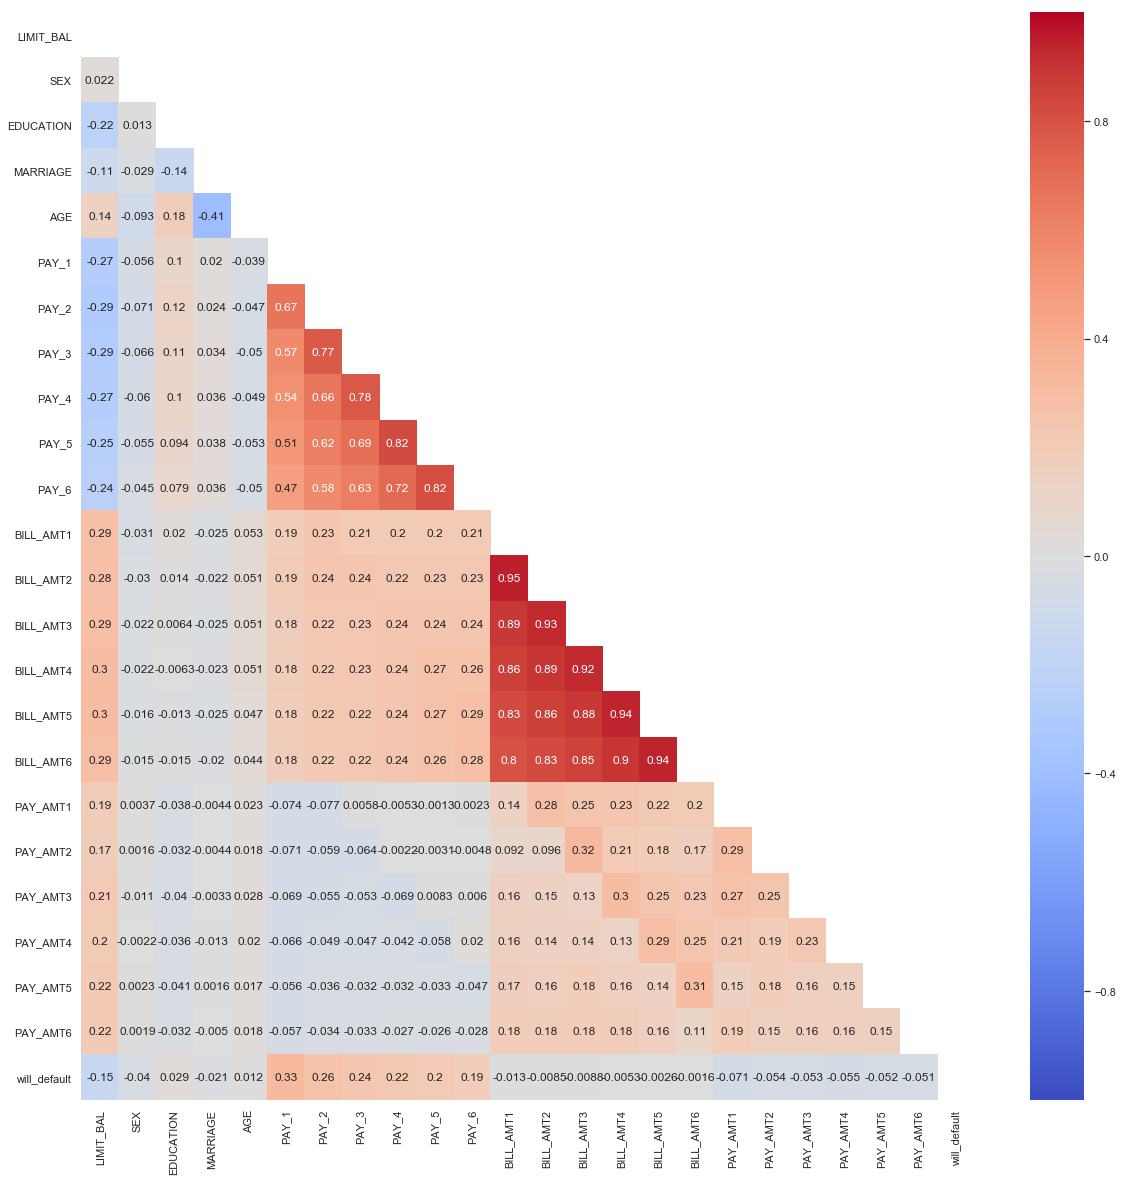

In [22]:
correlation = df.corr()
plt.figure(figsize=(20,20))
mask=np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
heatmap = sns.heatmap(correlation, annot=True, mask=mask, 
                      linewidths=0, vmin=-1, cmap="coolwarm")

In [23]:
feature_list=list(set(df.columns)-{'default','default payment next month'})
feature_list

['PAY_2',
 'PAY_AMT6',
 'PAY_5',
 'LIMIT_BAL',
 'PAY_1',
 'BILL_AMT4',
 'PAY_AMT1',
 'BILL_AMT3',
 'BILL_AMT6',
 'MARRIAGE',
 'PAY_AMT2',
 'PAY_AMT4',
 'PAY_AMT3',
 'BILL_AMT5',
 'PAY_3',
 'PAY_AMT5',
 'BILL_AMT2',
 'BILL_AMT1',
 'PAY_6',
 'AGE',
 'EDUCATION',
 'SEX',
 'will_default',
 'PAY_4']

In [24]:
df.median()

LIMIT_BAL       140000.0
SEX                  2.0
EDUCATION            2.0
MARRIAGE             2.0
AGE                 34.0
PAY_1                0.0
PAY_2                0.0
PAY_3                0.0
PAY_4                0.0
PAY_5                0.0
PAY_6                0.0
BILL_AMT1        22472.0
BILL_AMT2        21290.0
BILL_AMT3        20223.0
BILL_AMT4        19145.0
BILL_AMT5        18227.0
BILL_AMT6        17175.0
PAY_AMT1          2110.0
PAY_AMT2          2012.0
PAY_AMT3          1809.0
PAY_AMT4          1500.0
PAY_AMT5          1500.0
PAY_AMT6          1500.0
will_default         0.0
dtype: float64

In [25]:
df['HighorLow_PAY_AMT1'] = df['PAY_AMT1']

In [26]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'will_default', 'HighorLow_PAY_AMT1'],
      dtype='object')

In [27]:
df['PAY_AMT1']

0          2852
1          2007
2         30000
3          4000
4          1558
5          1382
6           678
7          5964
8             0
9         72001
10         2777
11            0
12        12000
13        10720
14         2100
15            0
16         2044
17         2182
18         9061
19         1700
20         2000
21         1900
22        10000
23            0
24         2876
25            0
26         3210
27         9000
28         1900
29         4080
30          150
31         1858
32            0
33         7097
34            0
35          440
36            0
37         2826
38         8058
39        15000
40         1142
41         1558
42         2800
43         2500
44         1845
45         5202
46          325
47         4512
48         1559
49         7000
50         4000
51         1614
52         1779
53            0
54            0
55         2000
56            0
57         2000
58         3250
59         2037
60         2000
61         8300
62      

In [28]:
df['HighorLow_PAY_AMT1'] = pd.cut(df.PAY_AMT1,
                     bins=[-1, 1449, 873552],
                     labels=[0, 1])


In [29]:
df['HighorLow_PAY_AMT1'].value_counts()

1    15936
0     8063
Name: HighorLow_PAY_AMT1, dtype: int64

In [30]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'will_default', 'HighorLow_PAY_AMT1'],
      dtype='object')

Text(0.5, 1.0, 'Payment Status VS. Payment Amount')

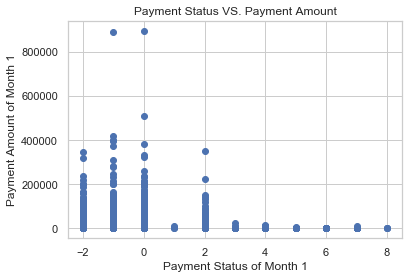

In [31]:
plt.scatter(df['PAY_3'], df['PAY_AMT3'])
plt.xlabel('Payment Status of Month 1')
plt.ylabel('Payment Amount of Month 1')
plt.title('Payment Status VS. Payment Amount')

In [32]:
df['PAY_1'].dtype

dtype('int64')

In [33]:
df['PAY_AMT1'].dtype

dtype('int64')

In [34]:
df['PAY_AMT1'].describe()

count     23999.000000
mean       5687.720113
std       16698.506577
min           0.000000
25%        1000.000000
50%        2110.000000
75%        5020.000000
max      873552.000000
Name: PAY_AMT1, dtype: float64

In [35]:
df['PAY_AMT1'].median

<bound method Series.median of 0          2852
1          2007
2         30000
3          4000
4          1558
5          1382
6           678
7          5964
8             0
9         72001
10         2777
11            0
12        12000
13        10720
14         2100
15            0
16         2044
17         2182
18         9061
19         1700
20         2000
21         1900
22        10000
23            0
24         2876
25            0
26         3210
27         9000
28         1900
29         4080
30          150
31         1858
32            0
33         7097
34            0
35          440
36            0
37         2826
38         8058
39        15000
40         1142
41         1558
42         2800
43         2500
44         1845
45         5202
46          325
47         4512
48         1559
49         7000
50         4000
51         1614
52         1779
53            0
54            0
55         2000
56            0
57         2000
58         3250
59         2037
60       

In [36]:
sorted(df[(df['PAY_6'])&(df['will_default']== 1)]['PAY_6'])[1]

-1

## 2. EDA

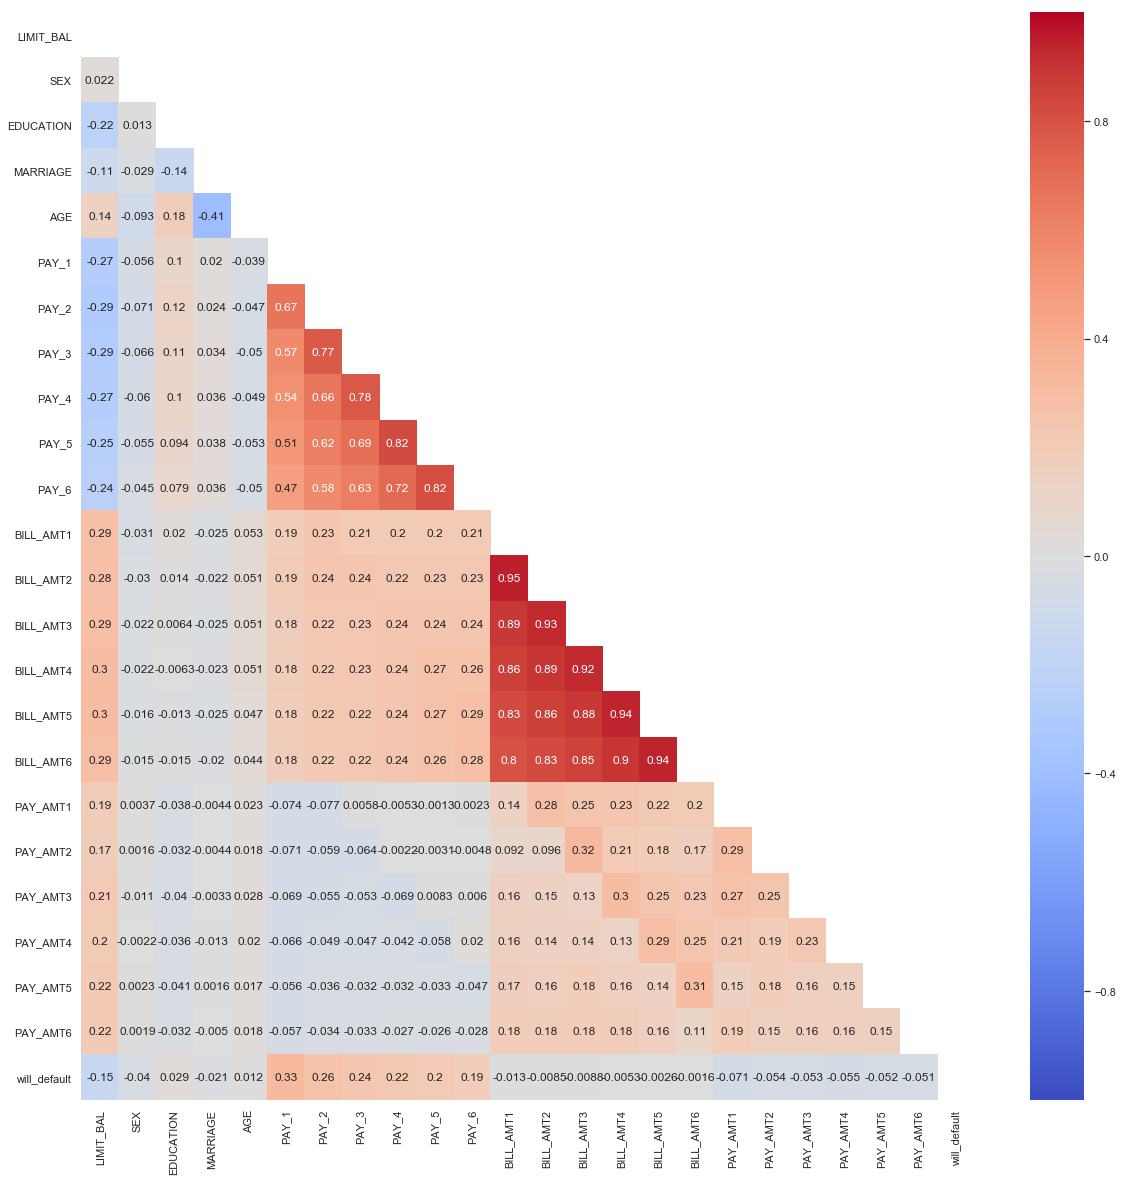

In [37]:
correlation = df.corr()
plt.figure(figsize=(20,20))
mask=np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
heatmap = sns.heatmap(correlation, annot=True, mask=mask, 
                      linewidths=0, vmin=-1, cmap="coolwarm")

## 3. Feature Engineering

In [40]:
df['portion_unpaid_1'] = abs((df['BILL_AMT1'] - df['PAY_AMT1']) / df['BILL_AMT1'])
df['portion_unpaid_2'] = abs((df['BILL_AMT2'] - df['PAY_AMT2']) / df['BILL_AMT2'])
df['portion_unpaid_3'] = abs((df['BILL_AMT3'] - df['PAY_AMT3']) / df['BILL_AMT3'])
df['portion_unpaid_4'] = abs((df['BILL_AMT4'] - df['PAY_AMT4']) / df['BILL_AMT4'])
df['portion_unpaid_5'] = abs((df['BILL_AMT5'] - df['PAY_AMT5']) / df['BILL_AMT5'])
df['portion_unpaid_6'] = abs((df['BILL_AMT6'] - df['PAY_AMT6']) / df['BILL_AMT6'])

In [41]:
df.describe()

LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    23999.000000  23999.000000  23999.000000  23999.000000  23999.000000   
mean    167825.729405      1.603608      1.856786      1.550773     35.523230   
std     129915.115993      0.489158      0.791939      0.522431      9.253986   
min      10000.000000      1.000000      0.000000      0.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     42.000000   
max    1000000.000000      2.000000      6.000000      3.000000     79.000000   

              PAY_1         PAY_2         PAY_3         PAY_4         PAY_5  \
count  23999.000000  23999.000000  23999.000000  23999.000000  23999.000000   
mean      -0.014959     -0.134839     -0.165632     -0.217092     -0.261344   
std        1.120903      1.193044      1.193515      1.168719      1.133016   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

              PAY_6      BILL_AMT1      BILL_AMT2     BILL_AMT3  \
count  23999.000000   23999.000000   23999.000000  2.399900e+04   
mean      -0.285845   51589.034710   49521.698112  4.747483e+04   
std        1.150394   74104.132627   71551.215125  7.001082e+04   
min       -2.000000 -165580.000000  -67526.000000 -1.572640e+05   
25%       -1.000000    3577.500000    2958.000000  2.718000e+03   
50%        0.000000   22472.000000   21290.000000  2.022300e+04   
75%        0.000000   67767.000000   64635.500000  6.096200e+04   
max        8.000000  964511.000000  983931.000000  1.664089e+06   

           BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count   23999.000000   23999.000000   23999.000000   23999.000000   
mean    43796.589775   40748.049169   39226.852411    5687.720113   
std     64927.450125   61257.537699   60075.536736   16698.506577   
min   -170000.000000  -81334.000000 -339603.000000       0.000000   
25%      2392.500000    1801.000000    1280.000000    1000.000000   
50%     19145.000000   18227.000000   17175.000000    2110.000000   
75%     55418.000000   50581.000000   49434.500000    5020.000000   
max    891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2       PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  2.399900e+04   23999.000000   23999.000000   23999.000000   
mean   6.019571e+03    5253.322805    4824.490687    4825.033793   
std    2.454136e+04   17967.028860   15730.753527   15596.580167   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    8.585000e+02     395.000000     300.000000     269.500000   
50%    2.012000e+03    1809.000000    1500.000000    1500.000000   
75%    5.000000e+03    4561.000000    4089.000000    4029.500000   
max    1.684259e+06  896040.000000  621000.000000  426529.000000   

            PAY_AMT6  will_default  portion_unpaid_1  portion_unpaid_2  \
count   23999.000000  23999.000000      2.283400e+04      2.251000e+04   
mean     5245.642943      0.221176               inf               inf   
std     17795.775322      0.415047               NaN               NaN   
min         0.000000      0.000000      0.000000e+00      0.000000e+00   
25%       125.000000      0.000000      8.614843e-01      8.727524e-01   
50%      1500.000000      0.000000      9.513732e-01      9.526038e-01   
75%      4008.000000      0.000000      9.766786e-01      9.807061e-01   
max    528666.000000      1.000000               inf               inf   

       portion_unpaid_3  portion_unpaid_4  portion_unpaid_5  por

In [42]:
df['avg_portion_unpaid'] = (df['portion_unpaid_1'] + df['portion_unpaid_2'] + df['portion_unpaid_3']+ df['portion_unpaid_4'] + df['portion_unpaid_5'] + df['portion_unpaid_6']) / 6

In [43]:
df['not_paying'] = df['PAY_1'] >=3

In [44]:
#Payment Ratio between months
df['first_month_ratio'] = abs((df['PAY_AMT6'] - df['PAY_AMT5']))/ abs(df['BILL_AMT5'])


In [45]:
df['second_month_ratio'] = abs((df['PAY_AMT5'] - df['PAY_AMT4']))/ abs(df['BILL_AMT4'])


In [46]:
df['third_month_ratio'] = abs((df['PAY_AMT4'] - df['PAY_AMT3']))/ abs(df['BILL_AMT3']) 


In [47]:
df['fourth_month_ratio'] = abs((df['PAY_AMT3'] - df['PAY_AMT2']))/ abs(df['BILL_AMT2']) 

In [48]:
df['fifth_month_ratio'] = abs((df['PAY_AMT2'] - df['PAY_AMT1']))/ abs(df['BILL_AMT1']) 

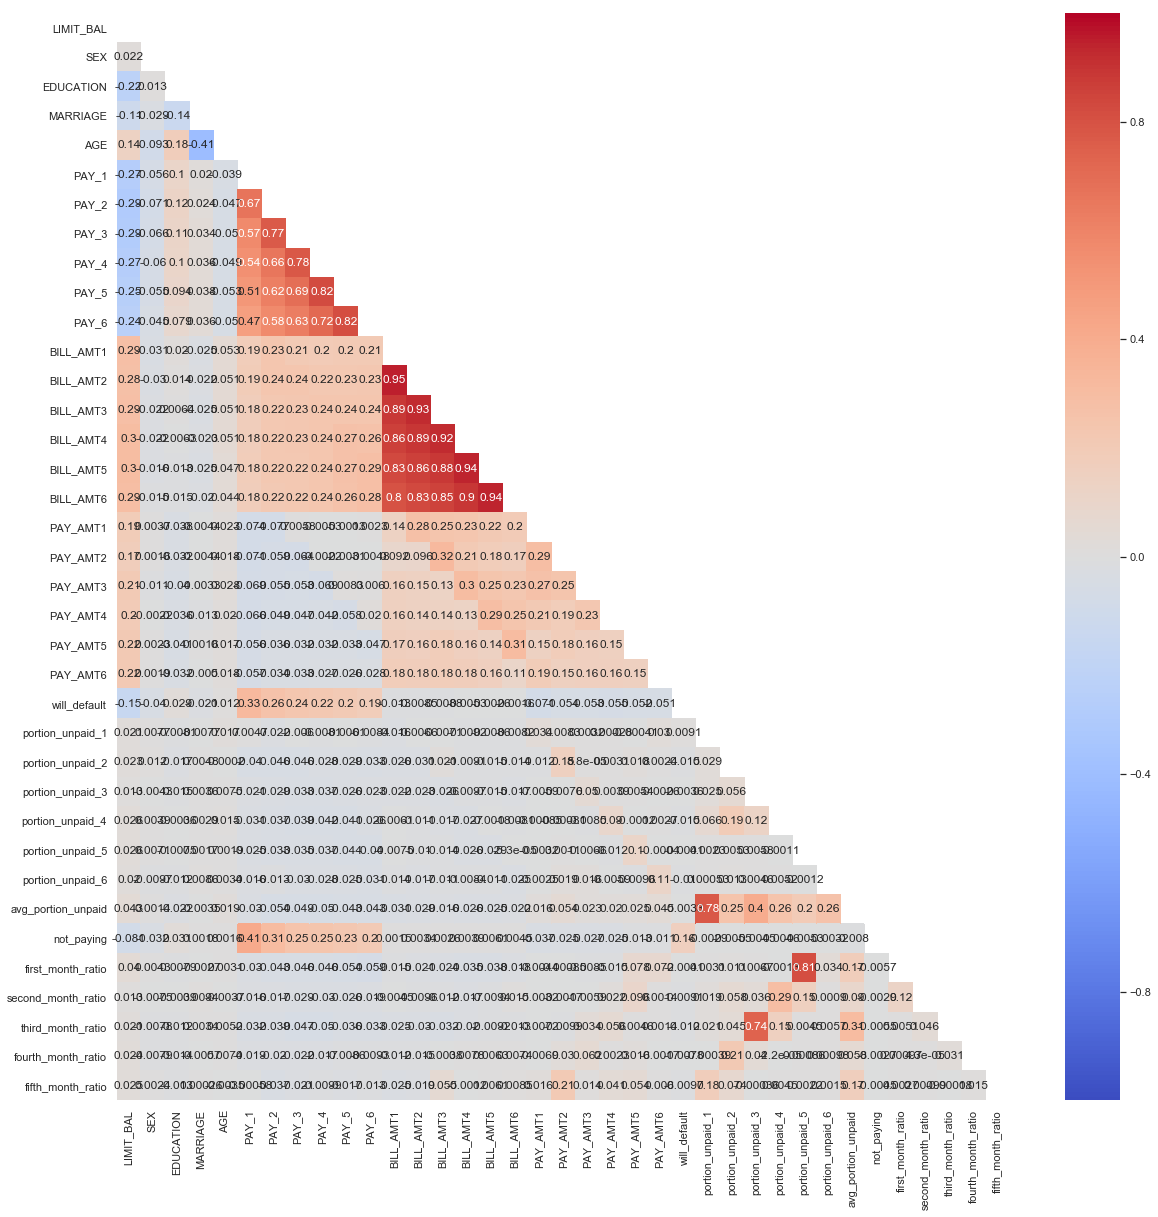

In [49]:
correlation = df.corr()
plt.figure(figsize=(20,20))
mask=np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
heatmap = sns.heatmap(correlation, annot=True, mask=mask, 
                      linewidths=0, vmin=-1, cmap="coolwarm")

In [50]:
indices_to_inspect=[]
for index in df['BILL_AMT6'].index:
    if df['BILL_AMT6'][index]<0:
        indices_to_inspect.append(index)

In [51]:
len(df['BILL_AMT6'])

23999

In [52]:
len(indices_to_inspect)

549

In [53]:
indices_to_inspect

['53',
 '151',
 '221',
 '258',
 '277',
 '284',
 '316',
 '347',
 '355',
 '369',
 '382',
 '401',
 '535',
 '544',
 '557',
 '579',
 '622',
 '659',
 '682',
 '692',
 '779',
 '807',
 '886',
 '907',
 '943',
 '972',
 '978',
 '1093',
 '1196',
 '1200',
 '1318',
 '1430',
 '1463',
 '1466',
 '1521',
 '1547',
 '1562',
 '1669',
 '1700',
 '1762',
 '1790',
 '1810',
 '1843',
 '1878',
 '1930',
 '1949',
 '1969',
 '1981',
 '2001',
 '2003',
 '2089',
 '2142',
 '2192',
 '2198',
 '2214',
 '2220',
 '2302',
 '2338',
 '2445',
 '2542',
 '2647',
 '2691',
 '2704',
 '2728',
 '2748',
 '2778',
 '2794',
 '2865',
 '2895',
 '2902',
 '3015',
 '3026',
 '3042',
 '3094',
 '3100',
 '3114',
 '3130',
 '3263',
 '3325',
 '3357',
 '3383',
 '3428',
 '3440',
 '3447',
 '3464',
 '3646',
 '3688',
 '3700',
 '3753',
 '3804',
 '3807',
 '3892',
 '3977',
 '3994',
 '4025',
 '4045',
 '4119',
 '4121',
 '4170',
 '4185',
 '4217',
 '4219',
 '4248',
 '4288',
 '4331',
 '4337',
 '4352',
 '4507',
 '4522',
 '4559',
 '4570',
 '4611',
 '4657',
 '4755',
 '

In [54]:
# Payment Status Increase over time
df['PAY_6']

0        0
1        0
2        0
3        0
4        0
5        0
6       -2
7       -2
8        0
9        0
10       0
11      -2
12       0
13       0
14       0
15       0
16       0
17      -2
18      -1
19       0
20       2
21       0
22       0
23       0
24      -2
25      -2
26       0
27       0
28       0
29       0
30      -1
31      -1
32      -2
33      -2
34      -1
35      -2
36      -1
37       0
38       0
39       0
40       0
41       0
42       0
43       0
44       0
45       0
46      -1
47       0
48       0
49       0
50       0
51       0
52      -2
53      -2
54      -2
55      -1
56      -2
57      -2
58       0
59      -1
60       0
61       0
62       0
63       0
64       0
65       2
66       0
67      -1
68      -1
69       0
70       0
71       2
72      -2
73      -2
74      -2
75       0
76       0
77      -1
78       0
79       0
80       0
81      -1
82       0
83      -1
84       0
85       2
86       0
87       0
88       2
89      -1
90       0

In [55]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'will_default', 'HighorLow_PAY_AMT1', 'portion_unpaid_1',
       'portion_unpaid_2', 'portion_unpaid_3', 'portion_unpaid_4',
       'portion_unpaid_5', 'portion_unpaid_6', 'avg_portion_unpaid',
       'not_paying', 'first_month_ratio', 'second_month_ratio',
       'third_month_ratio', 'fourth_month_ratio', 'fifth_month_ratio'],
      dtype='object')

In [387]:
#Lump together -2, -1, 0 payment status
df[df['PAY_6'] == -2] = 0

In [392]:
final[final['PAY_6'] == -2] = 0

In [388]:
df[df['PAY_6'] == -1] = 0

In [393]:
final[final['PAY_6'] == -1] = 0

In [58]:
df.PAY_6.value_counts()

0    21534
2     2211
3      146
4       42
7       39
6       14
5       11
8        2
Name: PAY_6, dtype: int64

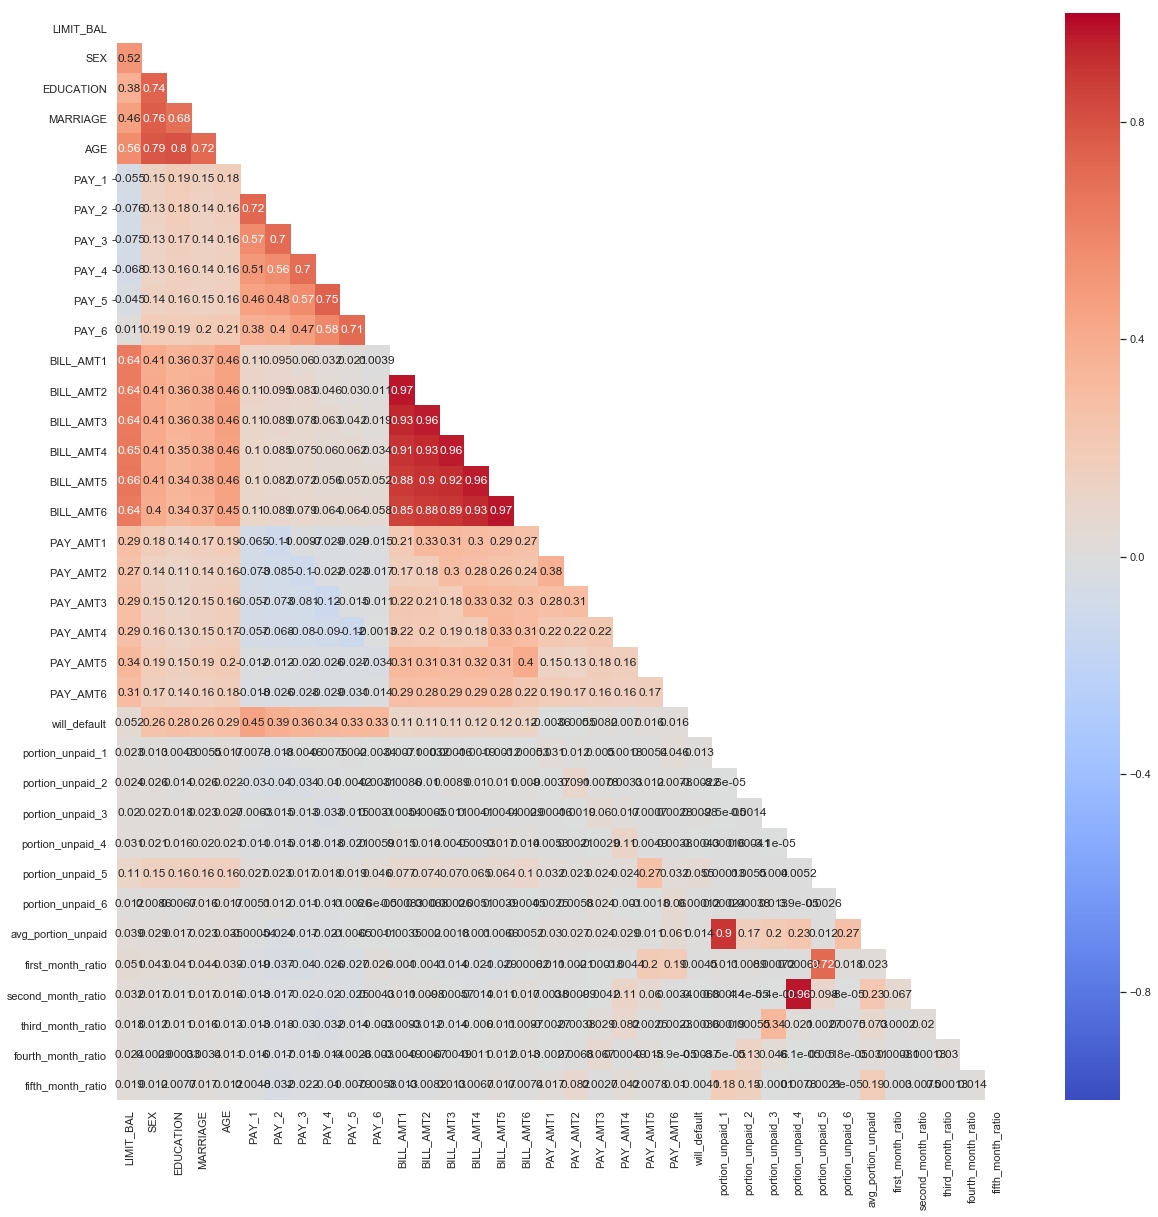

In [59]:
correlation = df.corr()
plt.figure(figsize=(20,20))
mask=np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
heatmap = sns.heatmap(correlation, annot=True, mask=mask, 
                      linewidths=0, vmin=-1, cmap="coolwarm")

In [391]:
df['AVG_PAY_STATUS'] = (df['PAY_1']+df['PAY_2']+df['PAY_3']+df['PAY_4']+df['PAY_5']+df['PAY_6']) / 6

In [396]:
final['AVG_PAY_STATUS'] = (final['PAY_1']+final['PAY_2']+final['PAY_3']+final['PAY_4']+final['PAY_5']+final['PAY_6']) / 6

In [61]:
df

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0          50000    1          2         2   49      0      0      0      0   
1          30000    1          2         1   39      0      0      0      0   
2         260000    1          1         2   27      0      0      0      0   
3         200000    2          2         1   33      0      0      0      0   
4          50000    1          1         2   27      0      0      0      0   
5         150000    2          1         1   46      0      0      0      0   
6              0    0          0         0    0      0      0      0      0   
7              0    0          0         0    0      0      0      0      0   
8         160000    2          2         2   32      2      2      2      2   
9         500000    2          1         1   44      0     -1     -1      0   
10         70000    2          3         2   52      0      0      0      0   
11             0    0          0         0    0      0      0      0      0   
12        230000    2          1         2   28     -1      0      0      0   
13        200000    1          1         1   37     -1     -1      0      0   
14        140000    2          2         2   23      0      0      0      0   
15         50000    2          2         2   22      1      2      0      0   
16         70000    2          2         2   36      0      0      0      0   
17             0    0          0         0    0      0      0      0      0   
18             0    0          0         0    0      0      0      0      0   
19         20000    1          3         1   69      0      0      0      0   
20        120000    2          2         3   37      2      2      2      2   
21         20000    1          2         2   47      0      0      2      0   
22        500000    2          2         2   23      4      3      2      0   
23         10000    2          2         2   36      1      2      0      0   
24             0    0          0         0    0      0      0      0      0   
25             0    0          0         0    0      0      0      0      0   
26        360000    2          1         1   32     -2     -2     -2     -2   
27        320000    2          1         1   42      0      0      0      0   
28         50000    1          3         1   28      0      0      0      0   
29        200000    1          2         2   48      0      0      0      0   
30             0    0          0         0    0      0      0      0      0   
31             0    0          0         0    0      0      0      0      0   
32             0    0          0         0    0      0      0      0      0   
33             0    0          0         0    0      0      0      0      0   
34             0    0          0         0    0      0      0      0      0   
35             0    0          0         0    0      0      0      0      0   
36             0    0          0         0    0      0      0      0      0   
37         60000    1          3         1   41      0      0      0      0   
38        200000    2          1         2   25      0      0      0      0   
39        190000    2          3         1   38      0      0      0      0   
40         10000    2          2         1   24      0      0      0      0   
41         50000    1          3         2   58     -1      0      0      0   
42        210000    2          3         1   53      0      0      0      0   
43         50000    1          2         1   41      0      0      0      0   
44         50000    1          1         2   25      0      0      0      0   
45        140000    2          2         1   35      0      0      0      0   
46             0    0          0         0    0      0      0      0      0   
47         90000    2          2         1   28     -1      0      0      0   
48         50000    2          2         2   46      0      0      0      0   
49        400000    1          2         2   31      0   

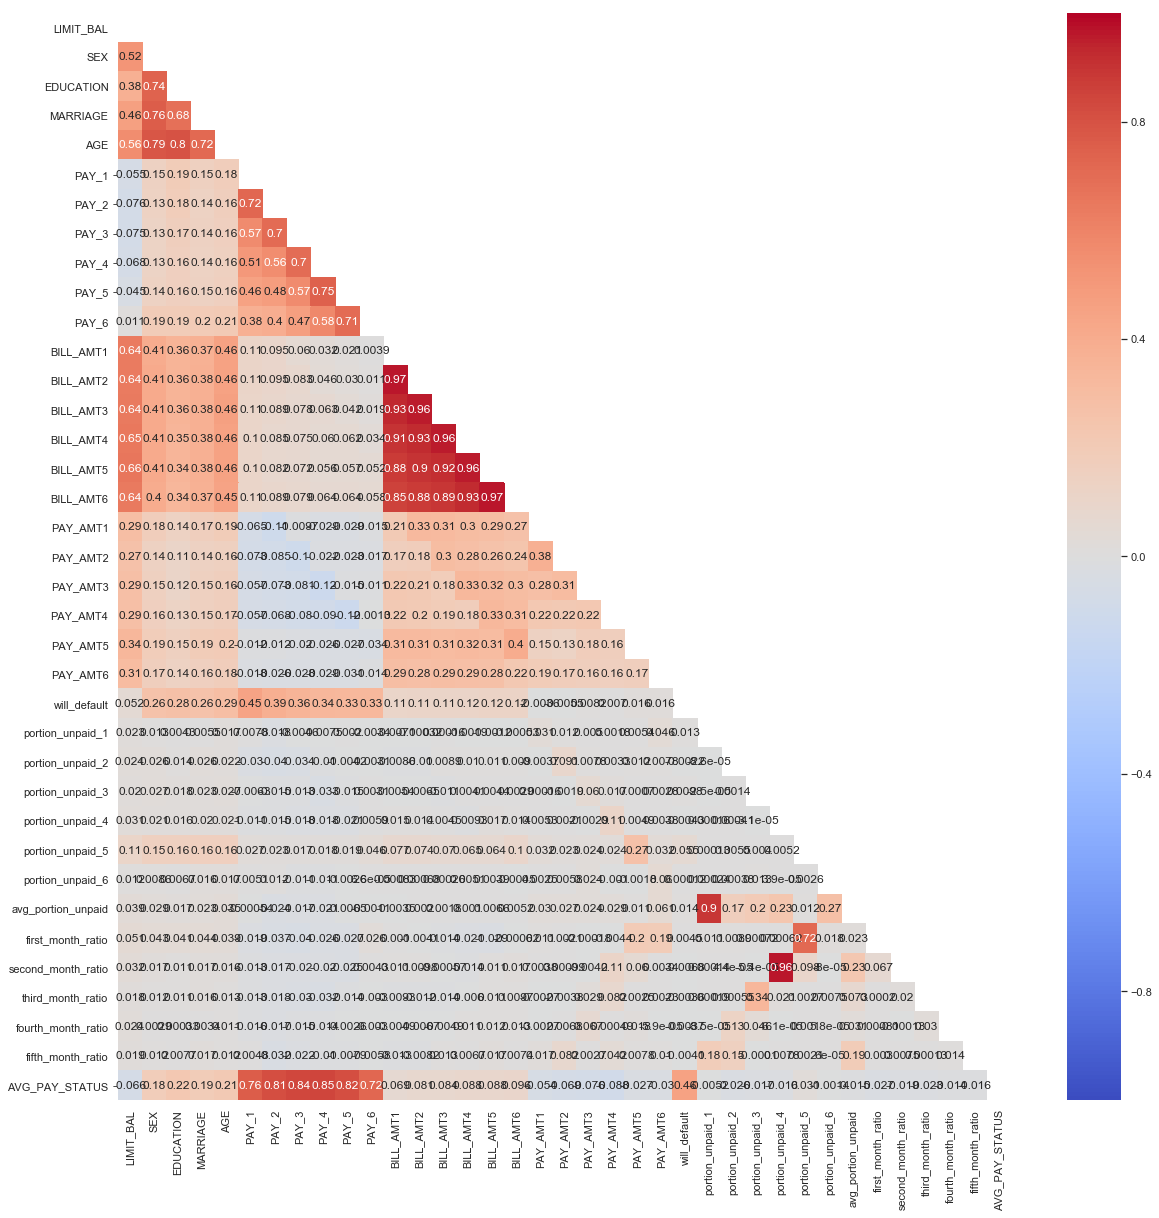

In [62]:
correlation = df.corr()
plt.figure(figsize=(20,20))
mask=np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
heatmap = sns.heatmap(correlation, annot=True, mask=mask, 
                      linewidths=0, vmin=-1, cmap="coolwarm")

In [63]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'will_default', 'HighorLow_PAY_AMT1', 'portion_unpaid_1',
       'portion_unpaid_2', 'portion_unpaid_3', 'portion_unpaid_4',
       'portion_unpaid_5', 'portion_unpaid_6', 'avg_portion_unpaid',
       'not_paying', 'first_month_ratio', 'second_month_ratio',
       'third_month_ratio', 'fourth_month_ratio', 'fifth_month_ratio',
       'AVG_PAY_STATUS'],
      dtype='object')

## 4. Feature Selection

In [66]:
feature_columns = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'will_default', 'portion_unpaid_1',
       'portion_unpaid_2', 'portion_unpaid_3', 'portion_unpaid_4',
       'portion_unpaid_5', 'portion_unpaid_6', 'avg_portion_unpaid',
       'not_paying', 'first_month_ratio', 'second_month_ratio',
       'third_month_ratio', 'fourth_month_ratio', 'fifth_month_ratio',
       'AVG_PAY_STATUS', 'HighorLow_PAY_AMT1']

In [67]:
target = df['will_default']
features = df[feature_columns]

In [69]:
#Checking for nulls and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23999 entries, 0 to 23998
Data columns (total 39 columns):
LIMIT_BAL             23999 non-null int64
SEX                   23999 non-null int64
EDUCATION             23999 non-null int64
MARRIAGE              23999 non-null int64
AGE                   23999 non-null int64
PAY_1                 23999 non-null int64
PAY_2                 23999 non-null int64
PAY_3                 23999 non-null int64
PAY_4                 23999 non-null int64
PAY_5                 23999 non-null int64
PAY_6                 23999 non-null int64
BILL_AMT1             23999 non-null int64
BILL_AMT2             23999 non-null int64
BILL_AMT3             23999 non-null int64
BILL_AMT4             23999 non-null int64
BILL_AMT5             23999 non-null int64
BILL_AMT6             23999 non-null int64
PAY_AMT1              23999 non-null int64
PAY_AMT2              23999 non-null int64
PAY_AMT3              23999 non-null int64
PAY_AMT4              23999 non-null

In [70]:
#Had to drop several columns because of nan and inf values
dfFinal = df.drop(df[['portion_unpaid_1', 'portion_unpaid_2', 'portion_unpaid_3', 'portion_unpaid_4', 'portion_unpaid_5', 'portion_unpaid_6', 'not_paying', 'first_month_ratio', 'second_month_ratio', 'third_month_ratio', 'fourth_month_ratio', 'fifth_month_ratio']], axis=1
       )




In [71]:
#Checking for more Nans and infs
dfFinal

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0          50000    1          2         2   49      0      0      0      0   
1          30000    1          2         1   39      0      0      0      0   
2         260000    1          1         2   27      0      0      0      0   
3         200000    2          2         1   33      0      0      0      0   
4          50000    1          1         2   27      0      0      0      0   
5         150000    2          1         1   46      0      0      0      0   
6              0    0          0         0    0      0      0      0      0   
7              0    0          0         0    0      0      0      0      0   
8         160000    2          2         2   32      2      2      2      2   
9         500000    2          1         1   44      0     -1     -1      0   
10         70000    2          3         2   52      0      0      0      0   
11             0    0          0         0    0      0      0      0      0   
12        230000    2          1         2   28     -1      0      0      0   
13        200000    1          1         1   37     -1     -1      0      0   
14        140000    2          2         2   23      0      0      0      0   
15         50000    2          2         2   22      1      2      0      0   
16         70000    2          2         2   36      0      0      0      0   
17             0    0          0         0    0      0      0      0      0   
18             0    0          0         0    0      0      0      0      0   
19         20000    1          3         1   69      0      0      0      0   
20        120000    2          2         3   37      2      2      2      2   
21         20000    1          2         2   47      0      0      2      0   
22        500000    2          2         2   23      4      3      2      0   
23         10000    2          2         2   36      1      2      0      0   
24             0    0          0         0    0      0      0      0      0   
25             0    0          0         0    0      0      0      0      0   
26        360000    2          1         1   32     -2     -2     -2     -2   
27        320000    2          1         1   42      0      0      0      0   
28         50000    1          3         1   28      0      0      0      0   
29        200000    1          2         2   48      0      0      0      0   
30             0    0          0         0    0      0      0      0      0   
31             0    0          0         0    0      0      0      0      0   
32             0    0          0         0    0      0      0      0      0   
33             0    0          0         0    0      0      0      0      0   
34             0    0          0         0    0      0      0      0      0   
35             0    0          0         0    0      0      0      0      0   
36             0    0          0         0    0      0      0      0      0   
37         60000    1          3         1   41      0      0      0      0   
38        200000    2          1         2   25      0      0      0      0   
39        190000    2          3         1   38      0      0      0      0   
40         10000    2          2         1   24      0      0      0      0   
41         50000    1          3         2   58     -1      0      0      0   
42        210000    2          3         1   53      0      0      0      0   
43         50000    1          2         1   41      0      0      0      0   
44         50000    1          1         2   25      0      0      0      0   
45        140000    2          2         1   35      0      0      0      0   
46             0    0          0         0    0      0      0      0      0   
47         90000    2          2         1   28     -1      0      0      0   
48         50000    2          2         2   46      0      0      0      0   
49        400000    1          2         2   31      0   

In [72]:
#Referencing columns to drop
dfFinal.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'will_default', 'HighorLow_PAY_AMT1', 'avg_portion_unpaid',
       'AVG_PAY_STATUS'],
      dtype='object')

In [73]:
# Dropping another feature not sure how to handle because of incompatible values
Final = dfFinal.drop(['avg_portion_unpaid'], axis=1)

In [74]:
# Hopefully these features will work
feature_columns = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','AVG_PAY_STATUS']

In [75]:
#Identifying target point and selected features
target = df['will_default']
features = df[feature_columns]

In [76]:
#Dividing data into test/train split.
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=34,test_size=0.2)

In [397]:
print(features.columns)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'AVG_PAY_STATUS'],
      dtype='object')


In [398]:
print(final.columns)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'AVG_PAY_STATUS'],
      dtype='object')


In [399]:
features.columns == final.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [77]:
#Scaling data? Not sure why.
scaler = StandardScaler()
scaler.fit(X_train)
X_train =pd.DataFrame(data=scaler.transform(X_train), columns=feature_columns)
X_test =pd.DataFrame(data=scaler.transform(X_test), columns=feature_columns)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [400]:
#Scaling data? Not sure why.
final_X_test = pd.DataFrame(data=scaler.transform(final), columns=final.columns)

In [78]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
X = features
y = df.will_default
logreg.fit(X, y)
df['default_pred_class'] = logreg.predict(X)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [79]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
zip(X_train.columns, logreg.coef_[0])

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [80]:
#Checking to see if the log coefficients make sense
logreg.coef_

array([[-0.17422213,  0.26016418,  0.10232137,  0.39644361,  0.59479315,
         0.64493058, -0.00534775,  0.05378265,  0.02731894,  0.00982977,
         0.17663796, -0.2254478 ,  0.29952588,  0.09269983,  0.01622828,
        -0.05652245, -0.03686262, -0.10824218, -0.02983427,  0.04570101,
         0.01431886, -0.05178454, -0.01017976,  0.18875453]])

In [112]:
#Importing the final testing data in order to predict the unknown values
df = pd.read_csv('classification_lab_data_holdout_features.csv')

In [113]:
# class predictions (not predicted probabilities)
# Not working because it's expecting more features, but the feature that is missing is the one I am trying to predict, right
# ...I don't know how to do this.
y_pred_class = logreg.predict(df)

ValueError: X has 23 features per sample; expecting 24

In [82]:
# calculate classification accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.8802083333333334


In [83]:
# this works regardless of the number of classes
y_test.value_counts().head(1) / len(y_test)

0    0.850625
Name: will_default, dtype: float64

In [84]:
# this only works for binary classification problems coded as 0/1
max(y_test.mean(), 1 - y_test.mean())

0.850625

In [85]:
# print confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_class))

[[3966  117]
 [ 458  259]]


In [86]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

In [87]:
print ('True Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)

True Positives: 259
True Negatives: 3966
False Positives: 117
False Negatives: 458


In [88]:
# calculate the sensitivity
print TP / float(TP + FN)
print 44 / float(44 + 51)

SyntaxError: invalid syntax (<ipython-input-88-6440e3819109>, line 2)

In [89]:
# calculate the specificity
print (TN / float(TN + FP))
print (105 / float(105 + 23))

0.9713445995591476
0.8203125


In [90]:
# store the predicted probabilities
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

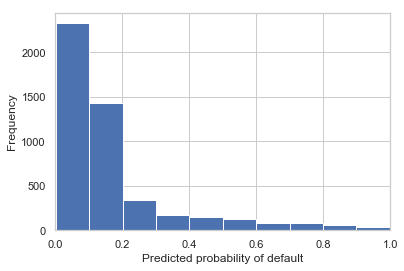

In [91]:
# histogram of predicted probabilities
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(y_pred_prob)
plt.xlim(0, 1)
plt.xlabel('Predicted probability of default')
plt.ylabel('Frequency')

In [92]:
y_pred_class = np.where(y_pred_prob > 0.3, 1, 0)

In [93]:
# old confusion matrix
print (confusion)

[[3966  117]
 [ 458  259]]


In [94]:
# new confusion matrix
print (metrics.confusion_matrix(y_test, y_pred_class))

[[3785  298]
 [ 310  407]]


In [97]:
df = pd.read_csv('classification_lab_data_holdout_features.csv')

In [98]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

In [99]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.8802083333333334


In [100]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

0    4083
1     717
Name: will_default, dtype: int64

In [101]:
# calculate null accuracy (for binary classification problems coded as 0/1)
max(y_test.mean(), 1 - y_test.mean())

0.850625

In [102]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
Pred: [0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


In [103]:
# IMPORTANT: first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(y_test, y_pred_class))

[[3966  117]
 [ 458  259]]


In [104]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_class)
classes = ['Defaulted', 'Not Defaulted']

In [105]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[3966  117]
 [ 458  259]]


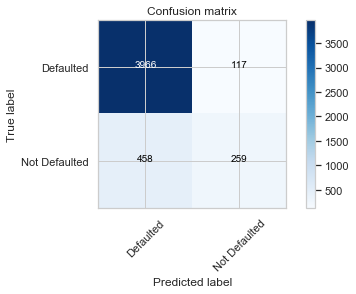

In [106]:
import itertools
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [347]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
Pred: [0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0]


In [348]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [349]:
print((TP + TN) / float(TP + TN + FP + FN))

0.8704166666666666


In [350]:
print(metrics.accuracy_score(y_test, y_pred_class))

0.8704166666666666


In [351]:
#Precision
print(TP / float(TP + FP))
print(metrics.precision_score(y_test, y_pred_class))

0.5901328273244781
0.5901328273244781


In [352]:
# Sensitivity
print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.43375174337517436
0.43375174337517436


In [353]:
#Specificity
print(TN / float(TN + FP))

0.9470977222630419


In [354]:
#False Positivity Rate
print(FP / float(TN + FP))

0.05290227773695812


In [355]:
#calculating the F1 score
2*(metrics.precision_score(y_test, y_pred_class)*metrics.recall_score(y_test, y_pred_class))/(metrics.precision_score(y_test, y_pred_class)+metrics.recall_score(y_test, y_pred_class))

0.5

In [356]:
# Adjusting classification threshold
THRESHOLD = 0.5
preds = np.where(logreg.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[metrics.accuracy_score(y_test, preds), metrics.recall_score(y_test, preds),
                   metrics.precision_score(y_test, preds), metrics.f1_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "F1"])

0
accuracy   0.880208
recall     0.361227
precision  0.688830
F1         0.473925

In [357]:
THRESHOLD = 0.75
preds = np.where(logreg.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[metrics.accuracy_score(y_test, preds), metrics.recall_score(y_test, preds),
                   metrics.precision_score(y_test, preds), metrics.f1_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "F1"])

0
accuracy   0.863750
recall     0.128312
precision  0.760331
F1         0.219570

## 5. Model Fitting and Hyperparameter Tuning
KNN, Logistic Regression, Decision Tree

In [358]:
# print the first 10 predicted responses
logreg.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [359]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10, :]

array([[0.63092892, 0.36907108],
       [0.84551868, 0.15448132],
       [0.82864903, 0.17135097],
       [0.83831705, 0.16168295],
       [0.98569892, 0.01430108],
       [0.98569892, 0.01430108],
       [0.89998206, 0.10001794],
       [0.96914744, 0.03085256],
       [0.41399172, 0.58600828],
       [0.98569892, 0.01430108]])

In [360]:
# print the first 10 predicted probabilities for class 1
logreg.predict_proba(X_test)[0:10, 1]

array([0.36907108, 0.15448132, 0.17135097, 0.16168295, 0.01430108,
       0.01430108, 0.10001794, 0.03085256, 0.58600828, 0.01430108])

In [361]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [362]:
# predict defualting if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.3)[0]

In [363]:
# print the first 10 predicted probabilities
y_pred_prob[0:10]

array([0.36907108, 0.15448132, 0.17135097, 0.16168295, 0.01430108,
       0.01430108, 0.10001794, 0.03085256, 0.58600828, 0.01430108])

In [364]:
# print the first 10 predicted classes with the lower threshold
y_pred_class[0:10]

array([1., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [365]:
# previous confusion matrix (default threshold of 0.5)
print(confusion)

[[3867  216]
 [ 406  311]]


In [366]:
# new confusion matrix (threshold of 0.3)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[3785  298]
 [ 310  407]]


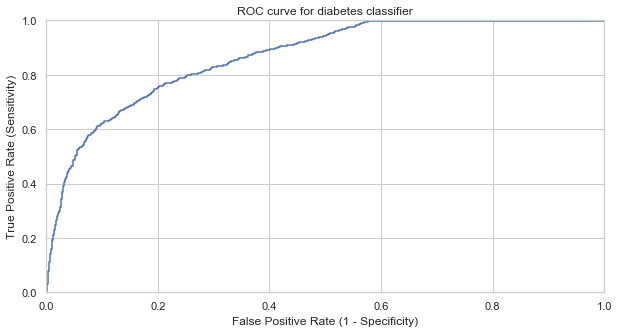

In [367]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [368]:
fpr, tpr, thresholds

(array([0.00000000e+00, 0.00000000e+00, 2.44917952e-04, 2.44917952e-04,
        9.79671810e-04, 9.79671810e-04, 1.22458976e-03, 1.22458976e-03,
        1.46950771e-03, 1.46950771e-03, 1.95934362e-03, 1.95934362e-03,
        2.20426157e-03, 2.20426157e-03, 2.44917952e-03, 2.44917952e-03,
        2.69409748e-03, 2.69409748e-03, 2.93901543e-03, 2.93901543e-03,
        3.18393338e-03, 3.18393338e-03, 3.67376929e-03, 3.67376929e-03,
        3.91868724e-03, 3.91868724e-03, 4.16360519e-03, 4.16360519e-03,
        4.40852314e-03, 4.40852314e-03, 4.65344110e-03, 4.65344110e-03,
        5.38819495e-03, 5.38819495e-03, 5.63311291e-03, 5.63311291e-03,
        6.36786676e-03, 6.36786676e-03, 6.61278472e-03, 6.61278472e-03,
        7.10262062e-03, 7.10262062e-03, 7.34753857e-03, 7.34753857e-03,
        7.83737448e-03, 7.83737448e-03, 8.08229243e-03, 8.08229243e-03,
        8.32721038e-03, 8.32721038e-03, 8.57212834e-03, 8.57212834e-03,
        8.81704629e-03, 8.81704629e-03, 9.55180015e-03, 9.551800

In [369]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [370]:
evaluate_threshold(0.5)

Sensitivity: 0.3612273361227336
Specificity: 0.9713445995591476


In [371]:
evaluate_threshold(0.3)

Sensitivity: 0.5662482566248257
Specificity: 0.9270144501591967


In [372]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.8654741177744507


In [373]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.46697800865578387

In [374]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [375]:
from sklearn.neighbors import KNeighborsClassifier

In [376]:
knn = KNeighborsClassifier(n_neighbors=1)

In [377]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')


In [378]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [379]:
# make class predictions for the testing set
y_pred_class = knn.predict(X_test)

In [380]:
# calculate accuracy
from sklearn import metrics
print('Accuracy:' + str(metrics.accuracy_score(y_test, y_pred_class)))
print('F1: ' + str(metrics.f1_score(y_test, y_pred_class)))

Accuracy:0.8347916666666667
F1: 0.44194229415904296


In [381]:
import matplotlib.pyplot as plt
import itertools
import numpy as np
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[3693  390]
 [ 403  314]]


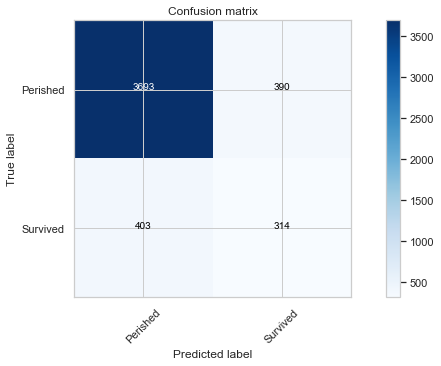

In [382]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_class)
classes = ['Perished', 'Survived']
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [383]:
# instantiate the model (using a different value fopr K)

knn5= KNeighborsClassifier(n_neighbors=5)


# fit the model with data
knn5.fit(X_train, y_train)

# make class predictions for the testing set
y_pred_class = knn5.predict(X_test)

In [402]:
test = pd.read_csv('/Users/flatironschool/Downloads/classification_lab_data_holdout.csv')

In [404]:
y_test_final = test.iloc[:,-1]

In [410]:
y_pred_final = knn5.predict(final_X_test)

In [411]:
print('Accuracy:' + str(metrics.accuracy_score(y_pred_final, y_test_final)))
print('F1: ' + str(metrics.f1_score(y_pred_final, y_test_final)))

Accuracy:0.7678720213297784
F1: 0.049146757679180884


In [412]:
y_pred_final = pd.DataFrame(y_pred_final)

In [414]:
y_pred_final.to_csv('Sam_Georgiy_preds.csv', index=False)

In [384]:
print('Accuracy:' + str(metrics.accuracy_score(y_pred_class, y_test)))
print('F1: ' + str(metrics.f1_score(y_pred_class, y_test)))

Accuracy:0.8704166666666666
F1: 0.5


In [ ]:
from sklearn.metrics import classification_report  

print(classification_report(y_test, y_pred_class))

In [39]:
type(y_pred_class)

NameError: name 'y_pred_class' is not defined

Confusion Matrix, without normalization
[[3867  216]
 [ 406  311]]


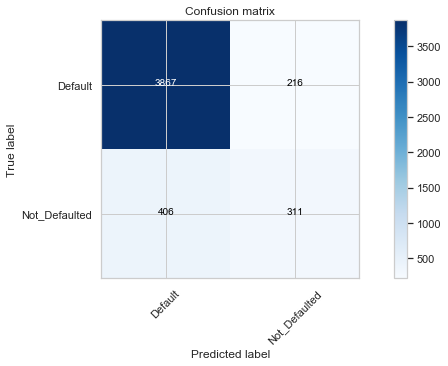

In [346]:
cm = confusion_matrix(y_test,y_pred_class)
classes = ['Default', 'Not_Defaulted']
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [344]:
#create a container to track the scores
k_scores=[]

#set up a loop to fit the model using a different values of K

k_range = list(range(1, 51, 2))
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_class - knn.predict(X_test)
    k.scores.append()
    
    
    #fit the model and get the score on a evaluation metric

# Print out the scores to see which one is best. 

AttributeError: 'int' object has no attribute 'scores'

In [345]:
# Separate input features (X) and target variable (y)
y = df_downsampled.balance
X = df_downsampled.drop('balance', axis=1)
 
# Train model
clf_2 = LogisticRegression().fit(X, y)
 
# Predict on training set
pred_y_2 = clf_2.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_2 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_2) )
# 0.581632653061

NameError: name 'df_downsampled' is not defined

## 6. Model Evaluation

## 7. Final Model